# Implementación de Modelo de Regresión Lineal

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from ipywidgets import FloatSlider, interact
from tqdm.notebook import tqdm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

%matplotlib inline

# Generamos data

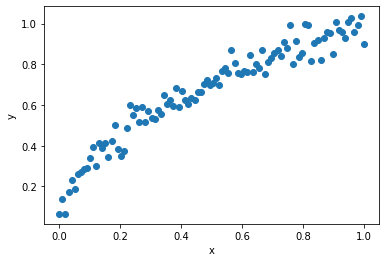

In [ ]:
np.random.seed(10)

n = 100 # Nro de datos
x = np.linspace(0, 1, n)
y = x**0.5 + np.random.normal(0, 0.05, n)

plt.plot(x, y, 'o')
plt.xlabel('x')
plt.ylabel('y');

# Definimos el modelo

$ f(x_i) = ax_i + b $

In [ ]:
a = 1
b = 0

def f(x): return a*x + b

y_ = f(x)

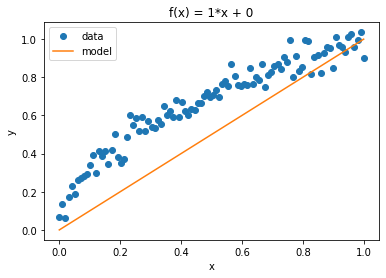

In [ ]:
def plot(title=''):
    plt.plot(x, y, 'o', label='data')
    plt.plot(x, y_, label='model')
    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()

plot(f'f(x) = {a}*x + {b}')

# Función de pérdida

$ L = \frac{1}{2m}\sum\limits_{i=1}^m (f(x_i) - y_i)^2 $

In [ ]:
def L(y, y_):
    return ((y_ - y)**2).mean() / 2
loss = L(y, y_)
loss

0.01857300630707608

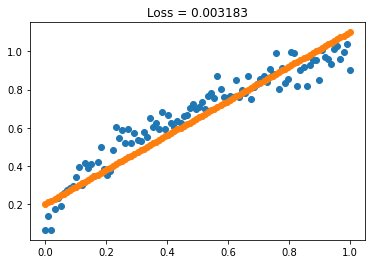

In [ ]:
slope = 0.9
intercept = 0.2
y_ = slope*x + intercept
plt.figure()
plt.title("Loss = {:3f}".format(L(y, y_)))
plt.scatter(x=x, y=y)
plt.scatter(x=x, y=y_)
plt.show()

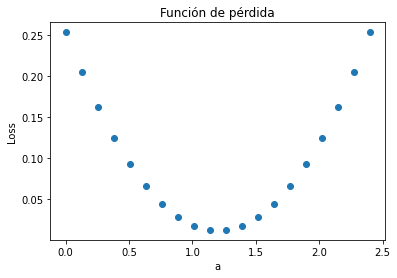

In [ ]:
# Función de pérdida en distintos puntos de a, teniendo b=0
test_a = np.linspace(0, 2.4, 20)
losses = [L(y, single_a*x + b) for single_a in test_a]

plt.plot(test_a, losses, 'o')
plt.title('Función de pérdida')
plt.xlabel('a')
plt.ylabel('Loss')
plt.show()

# Optimización

## Gradients

$ \frac{dL}{da} = \sum\limits_{i=1}^m (f(x_i) - y_i)(x_i)$

$ \frac{dL}{db} = \sum\limits_{i=1}^m (f(x_i) - y_i)$

In [ ]:
def gradients(x, y, y_):
    da = ((y_ - y) * x).mean()
    db = (y_ - y).mean()
    return da, db

gradients(x, y, y_)

(0.016110335559316746, 0.03123389162168894)

## Gradient descent

  0%|          | 0/50 [00:00<?, ?it/s]

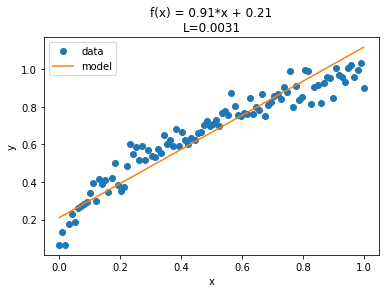

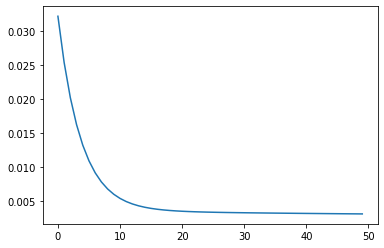

In [ ]:
# initial params
b = 0
lr = 0.1
steps = 50
losses = []

for i in tqdm(range(steps)):
    y_ = f(x)
    loss = L(y, y_)
    losses.append(loss)
    da, db = gradients(x, y, y_)
    a -= da*lr
    b -= db*lr

plot(f'f(x) = {a:.2}*x + {b:.2}\nL={loss:.2}')
plt.plot(losses);

# Casas Simple

In [ ]:
url_casas_simple ='https://raw.githubusercontent.com/lmiguelmh/deep-learning/master/multivariate-regression/CasasSimple.txt'
url_casas_mult ='https://raw.githubusercontent.com/lmiguelmh/deep-learning/master/multivariate-regression/CasasMulti.txt'
df = pd.read_table(url_casas_simple, names=['metros_cuadrados', 'precio'])
print(df.shape)
df.head()

(58, 2)


,metros_cuadrados,precio
0,132.3,319000.0
1,141.5,389000.0
2,71.2,199000.0
3,277.4,599000.0
4,338.7,750000.0


In [ ]:
# Separamos las variables dependientes e independientes
x = df['metros_cuadrados'].values
y = np.log(df['precio'].values)

In [ ]:
# Para evaluar el modelo dividimos la data en un conjunto de entrenamiento y validación
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.33, random_state=42)
x_train.shape, x_val.shape

((38,), (20,))

In [ ]:
# Normalizamos la data
x_mean = x_train.mean()
x_std = x_train.std()
x_train = (x_train - x_mean) / x_std

# Aplicamos la misma normalizacion al conjunto de validacion
x_val = (x_val - x_mean) / x_std

In [ ]:
# Algunas funciones para graficar
def plot_train_val(title=''):
    y_train_ = f(x_train)
    y_val_ = f(x_val)
    fig, [ax1, ax2] = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(10,4))
    ax1.plot(x_train, y_train, 'o', label='data')
    ax1.plot(x_train, y_train_, label='model')
    ax1.set_title(f'Train (L={L(y_train, y_train_):.4f})')
    ax1.legend()
    ax2.plot(x_val, y_val, 'o', label='data')
    ax2.plot(x_val, y_val_, label='model')
    ax2.set_title(f'Validation (L={L(y_val, y_val_):.4f})')
    plt.tight_layout()
    plt.show()

def plot_losses():
    plt.plot(losses_train, label='train')
    plt.plot(losses_val, label='validation')
    plt.legend()
    plt.show()

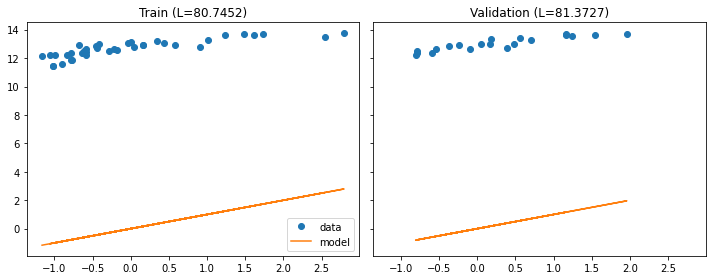

In [ ]:
plot_train_val()


f(x) = 0.52*x + 12.69


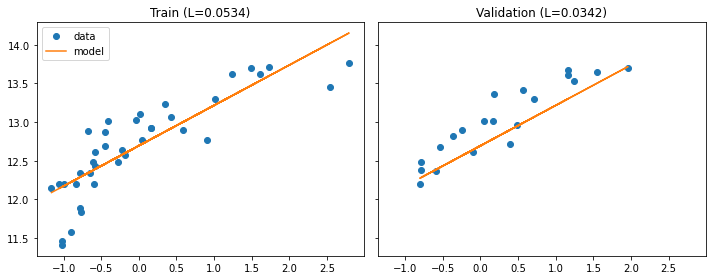

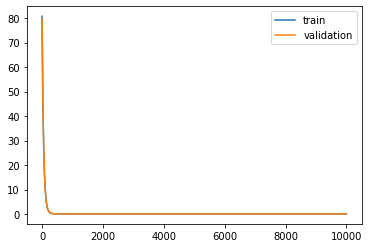

In [ ]:
a = 1
b = 0
lr = 0.01
steps = 10_000
losses_train = []
losses_val = []

for i in tqdm(range(steps)):
    # Guardamos las perdidas
    loss_train = L(y_train, y_)
    loss_val = L(y_val, f(x_val))
    losses_train.append(loss_train)
    losses_val.append(loss_val)

print(f'f(x) = {a:.2f}*x + {b:.2f}')
plot_train_val()
plot_losses()

# Multiple linear regression

$ f(x_{1i}, x_{2i}) = ax_{1i} + bx_{2i} + c $

In [ ]:
np.random.seed(10)

n = 100

x1 = np.random.normal(size=n) + np.random.normal(0, 0.5, n)
x2 = np.random.normal(size=n) + np.random.normal(0, 0.5, n)
y = x1 + x2*2 + np.random.normal(1, 1, n)

In [ ]:
a = 1.0
b = 1.0
c = 0.0

def f(x1,x2): return a*x1 + b*x2 + c

y_ = f(x1,x2)

In [ ]:
def plot3d(title=''):
    trace = go.Scatter3d(
        x=x1, y=x2, z=y,
        mode='markers',
        marker={'size':2, 'opacity':0.8}
    )

    mesh_x1 = [-4,-4,4,4]
    mesh_x2 = [-4,4,-4,4]
    mesh_y = [f(x1,x2) for x1,x2 in zip(mesh_x1,mesh_x2)]

    mesh = go.Mesh3d(x=mesh_x1, y=mesh_x2, z=mesh_y, opacity=0.5)

    layout = go.Layout({
        'title': title,
        'scene':{
            'xaxis':{'title':'x1'},
            'yaxis':{'title':'x2'},
            'zaxis':{'title':'y'}
        }
    })

    fig = go.Figure(data=[trace, mesh], layout=layout)

    return fig

loss = L(y, y_)
plot3d(f'f(x) = {a:.2}(x1) + {b:.2}(x2) + {c:.2}<br>L={loss:.2}').show()

$ \hat{y} = f(x_{1i}, x_{2i}) = ax_{1i} + bx_{2i} + c $

$ L = \frac{1}{2m}\sum\limits_{i=1}^m (\hat{y} - y_i)^2 $

$ \frac{dL}{da} = \sum\limits_{i=1}^m (\hat{y} - y_i)(x_{1i})$

$ \frac{dL}{db} = \sum\limits_{i=1}^m (\hat{y} - y_i)(x_{2i})$

$ \frac{dL}{dc} = \sum\limits_{i=1}^m (\hat{y} - y_i)$

In [ ]:
def gradients_mult(x1, x2, y, y_):
    da = ((y_ - y) * x1).mean()
    db = ((y_ - y) * x2).mean()
    dc = (y_ - y).mean()

    return da, db, dc

gradients_mult(x1, x2, y, y_)

(-0.17682251230571785, -1.2459663089216684, -0.9666406308813196)

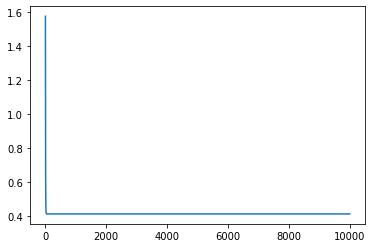

In [ ]:
# initial params
a = 1
b = 1
c = 0
lr = 0.1
steps = 10_000
losses = []

for i in tqdm(range(steps)):
    y_ = f(x1, x2)
    loss = L(y, y_)
    losses.append(loss)
    da, db, dc = gradients_mult(x1, x2, y, y_)
    a -= da*lr
    b -= db*lr
    c -= dc*lr

loss = L(y, y_)
display(plot3d(f'f(x) = {a:.2}(x1) + {b:.2}(x2) + {c:.2}<br>L={loss:.2}'))
plt.plot(losses);

# Casas Multi

In [ ]:
df = pd.read_table(url_casas_mult, names=['m2_construidos', 'num_cuartos', 'num_banos', 'm2_habitables', 'precio'])
print(df.shape)
df.head()

(58, 5)


,m2_construidos,num_cuartos,num_banos,m2_habitables,precio
0,132.3,3,2,66.15,319000.0
1,141.5,3,2,70.75,389000.0
2,71.2,1,1,71.20,199000.0
3,277.4,3,2,138.70,599000.0
4,338.7,4,4,84.68,750000.0


In [ ]:
# Separamos las variables dependientes e independientes
x = df.drop('precio', axis=1)
y = np.log(df['precio'].values)

# Para evaluar el modelo dividimos la data en un conjunto de entrenamiento y validación
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.33, random_state=42)
x_train.shape, x_val.shape

((38, 4), (20, 4))

In [ ]:
# Usamos el metodo StandardScaler para normalizar todas las variables
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

# Aplicamos el scaler al conjunto de validación
x_val = scaler.transform(x_val)

In [ ]:
# Separamos las variables
x1_train, x1_val = x_train[:, 0], x_val[:, 0]
x2_train, x2_val = x_train[:, 1], x_val[:, 1]
x3_train, x3_val = x_train[:, 2], x_val[:, 2]
x4_train, x4_val = x_train[:, 3], x_val[:, 3]

$ f(x_{1i}, x_{2i}) = ax_{1i} + bx_{2i} + cx_{3i} + dx_{4i} + e $

In [ ]:
# Definimos el modelo

y_train_ = f(x1_train, x2_train, x3_train, x4_train)
y_val_ = f(x1_val, x2_val, x3_val, x4_val)

print(f'Train loss      = {L(y_train, y_train_):.4f}')
print(f'Validation loss = {L(y_val, y_val_):.4f}')

Train loss      = 84.0930
Validation loss = 76.3324


# Usando matrices


f(x) = 0.64*x1 + -0.14*x2 + -0.01*x3 + -0.02*x4 + 12.69
Train loss      = 0.0505
Validation loss = 0.0312


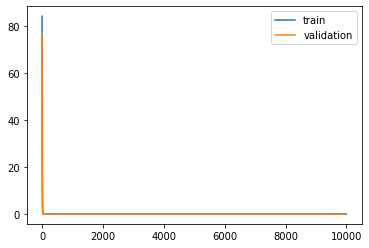

In [ ]:
print(f'f(x) = {a:.2f}*x1 + {b:.2f}*x2 + {c:.2f}*x3 + {d:.2f}*x4 + {e:.2f}')
print(f'Train loss      = {loss_train:.4f}')
print(f'Validation loss = {loss_val:.4f}')
plot_losses()

In [ ]:
# Usamos la misma data del ejercicio 2
df = pd.read_table(url_casas_mult, names=['m2_construidos', 'num_cuartos', 'num_banos', 'm2_habitables', 'precio'])

# Separamos las variables dependientes e independientes
x = df.drop('precio', axis=1)
y = np.log(df['precio'].values)

# Para evaluar el modelo dividimos la data en un conjunto de entrenamiento y validación
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.33, random_state=42)

# Usamos el metodo StandardScaler para normalizar todas las variables
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

# Aplicamos el scaler al conjunto de validación
x_val = scaler.transform(x_val)

x_train.shape, x_val.shape, y_train.shape, y_val.shape

((38, 4), (20, 4), (38,), (20,))

In [ ]:
# Creamos una matriz de pesos y un valor para el bias
w = np.ones([x.shape[1], 1])
b = 0

w.shape

(4, 1)

In [ ]:
# Definimos el modelo
def f(x): return x@w + b

y_train_ = f(x_train)
y_train_.shape, y_train.shape

((38, 1), (38,))

In [ ]:
# Usamos la funcion ravel() para que el resultado tenga solo 1 dimension
def f(x): return (x@w + b).ravel()

y_train_ = f(x_train)
y_train_.shape, y_train.shape

((38,), (38,))

In [ ]:
y_val_ = f(x_val)
print(f'Train loss      = {L(y_train, y_train_):.4f}')
print(f'Validation loss = {L(y_val, y_val_):.4f}')

Train loss      = 84.0930
Validation loss = 76.3324


In [ ]:
def gradients_matrices(x, y, y_):
    dw = (x.T @ (y_ - y)) / len(x)
    db = (y_ - y).mean()
    return dw[:,None], db

gradients_matrices(x_train, y_train, y_train_)

(array([[2.4983424 ],
        [2.41344952],
        [2.13058758],
        [1.13592854]]), -12.694690176511244)


w = [ 0.64 -0.14 -0.01 -0.02]
b = 12.69
Train loss      = 0.0505
Validation loss = 0.0312


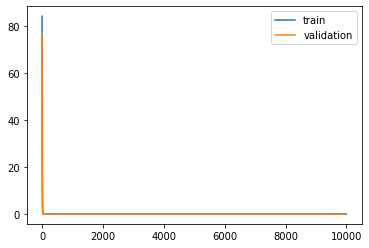

In [ ]:
w = np.ones([x.shape[1], 1])
b = 0
lr = 0.1
steps = 10_000
losses_train = []
losses_val = []

for i in tqdm(range(steps)):
    y_ = f(x_train)

    loss_train = L(y_train, y_)
    loss_val = L(y_val, f(x_val))
    losses_train.append(loss_train)
    losses_val.append(loss_val)

    dw, db = gradients_matrices(x_train, y_train, y_)
    w -= dw*lr
    b -= db*lr

print(f'w = {w.ravel().round(2)}')
print(f'b = {b:.2f}')
print(f'Train loss      = {loss_train:.4f}')
print(f'Validation loss = {loss_val:.4f}')
plot_losses()

In [ ]:
n = 15
results = pd.DataFrame({'real': y_val, 'pred': f(x_val)})
results['error'] = results['pred'] - results['real']
results.head(n).round(4).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
real,12.6729,13.6048,12.6099,12.8980,13.0168,13.0169,12.8186,13.3692,12.7219,12.3842,12.2011,13.3030,13.4135,12.4854,12.9692
pred,12.3777,13.3485,12.5535,12.5532,12.8200,12.7251,12.4757,12.8331,12.8720,12.2233,12.2156,13.1223,13.0648,12.1890,12.9315
error,-0.2952,-0.2563,-0.0564,-0.3447,-0.1968,-0.2918,-0.3428,-0.5361,0.1501,-0.1610,0.0145,-0.1807,-0.3487,-0.2964,-0.0377


# Ejercicio 3: Diabetes Dataset

In [ ]:
from sklearn.datasets import load_diabetes
data = load_diabetes()

In [ ]:
data.keys()

dict_keys(['data', 'target', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])

In [ ]:
print(data['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

In [ ]:
x = data['data']
y = data['target']
x.shape, y.shape

((442, 10), (442,))

In [ ]:
# Para evaluar el modelo dividimos la data en un conjunto de entrenamiento y validación
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.33, random_state=42)
x_train.shape, x_val.shape

((296, 10), (146, 10))

In [ ]:
n = 15
results = pd.DataFrame({'real': y_val, 'pred': f(x_val)})
results['error'] = results['pred'] - results['real']
results.head(n).round(4).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
real,219.0000,70.0000,202.0000,230.000,111.0000,84.0000,242.0000,272.0000,94.000,96.000,94.0000,252.0000,99.0000,297.0000,135.0000
pred,139.7918,179.7074,137.2657,283.936,124.3804,96.1178,251.6132,186.4243,82.953,115.738,96.7736,154.8702,69.7018,204.7184,102.2091
error,-79.2082,109.7074,-64.7343,53.936,13.3804,12.1178,9.6132,-85.5757,-11.047,19.738,2.7736,-97.1298,-29.2982,-92.2816,-32.7909
